<h1 style="background-color:#d9ead3; padding:10px; text-align:center;">STUDENT PERFORMANCE DATASET</h1>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;">
    Il dataset "Student Performance" si distingue per la sua ricchezza di informazioni, offrendo una panoramica dettagliata sui diversi fattori che influenzano l'apprendimento e i risultati accademici degli studenti. Dai dati demografici, come età e sesso, alle informazioni più specifiche su abitudini di studio e supporto familiare, questo insieme di dati permette una comprensione multidimensionale delle dinamiche scolastiche. Attraverso l'analisi di tali variabili, ricercatori ed educatori possono identificare tendenze significative, determinare l'impatto di vari fattori esterni e interni sul rendimento scolastico, e sviluppare strategie mirate per migliorare l'efficacia dell'insegnamento e dell'apprendimento.
</p>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;">
    In questo progetto, esploreremo un dataset per comprendere meglio le relazioni tra diverse variabili e costruire un modello di regressione lineare per fare previsioni accurate. La nostra analisi inizia con l'importazione delle librerie necessarie in Python, che includono pandas per la manipolazione dei dati, numpy per le operazioni numeriche, matplotlib e seaborn per la visualizzazione dei dati, e scikit-learn per il preprocessing e la modellazione. Dopo aver importato le librerie, carichiamo il dataset utilizzando pandas. La gestione dei valori mancanti è il nostro prossimo passo: decidiamo se imputarli o eliminarli in base alla loro quantità e al tipo di analisi prevista. Segue la gestione degli outliers, che potrebbero distorcere i risultati del modello. Utilizziamo tecniche statistiche per identificarli e decidiamo se correggerli o rimuoverli. Successivamente, standardizziamo i dati utilizzando il StandardScaler di scikit-learn. Questo passaggio è cruciale per molti algoritmi di machine learning che presuppongono che tutte le caratteristiche siano su una scala comune. Una volta standardizzati i dati, procediamo con la divisione del dataset in un set di training e uno di test, garantendo che entrambi contengano una rappresentazione simile delle varie classi presenti nel dataset. Per offrire una visione più approfondita dei dati, generiamo una serie di "grafici carini" che mostrano statistiche interessanti. Questi possono includere grafici a dispersione per visualizzare le relazioni bivariate, istogrammi per esaminare le distribuzioni delle variabili e box plots per evidenziare la presenza di outliers. Infine, costruiamo un modello di regressione lineare utilizzando il set di training. Questo modello ci aiuterà a capire l'importanza e l'impatto di ogni variabile sulle variabili di risposta. Valutiamo il modello sul set di test per verificare la sua accuratezza e la sua capacità di generalizzare su nuovi dati non visti durante il training.
Attraverso questi passaggi, non solo prepariamo il dataset per l'analisi, ma possiamo anche trarre insight significativi e fare previsioni informate, mettendo in luce il potenziale del machine learning applicato alla data analysis.
    
</p>


<h2 style="color:#D6EEC4; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; ">Importazione librerie necessarie</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.model_selection import train_test_split 

<h2 style="color:#D6EEC4; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; ">Importazione del dataset</h2>

In [8]:
# Caricamento del dataset Student performance, file CSV
df = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

In [9]:
# Stampa delle prime righe del DataFrame per verificare che sia stato caricato correttamente e per leggerle
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


<h2 style="color:#c2e2ff; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La Gestione dei missing values</h2>

<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
    I "missing values", o valori mancanti, si riferiscono a dati che sono assenti in un dataset. Questa assenza può derivare da vari motivi, come errori nella raccolta dei dati, perdita di informazioni o mancata risposta a determinate domande in un sondaggio. La gestione di questi valori mancanti è cruciale nell'analisi dei dati per diverse ragioni come ad esempio il fatto che siano capaci di influenzare radicalmente le conclusioni del dataset.

</p>


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
    Perciò il codice sotto verifica la presenza di valori mancanti (missing values) del nostro file CSV e comunica i risultati. In questo caso nel dataset non erano presenti missing values e perciò viene proprio stampata con ''Print'' la loro non presenza. Ad ogni modo questo processo è cruciale all'inizio dell'analisi dei dati perché se son presenti missing values, possono influenzare significativamente le conclusioni dell'analisi.
</p>


In [4]:
# Conteggio dei valori mancanti per ogni colonna
missing_values = df.isnull().sum()

# Stampa il numero di valori mancanti per ogni colonna se esistono valori mancanti
if missing_values.any():
    print("Numero di valori mancanti per ogni colonna:")
    print(missing_values[missing_values > 0])
else:
    print("Nessun valore mancante nel dataset.")


Nessun valore mancante nel dataset.


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   Qui si calcolano le percentuali di valori mancanti e non mancanti. Successivamente, visualizza queste informazioni attraverso un grafico a torta colorato e facilmente interpretabile, con una sezione "explode" per dare risalto ai valori non mancanti. L'obiettivo è fornire un'illustrazione visiva della qualità dei dati analizzando la presenza di valori mancanti nel dataset. 
</p>





<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   TRA L'ALTRO In Python, "explode" è un termine comunemente associato ai DataFrame della libreria pandas. Questo metodo è utilizzato per trasformare ogni elemento di una lista presente in una riga di un DataFrame in righe separate, mantenendo il valore di tutte le altre colonne invariate. Di fatto, "explode" permette di "espandere" una lista contenuta in una singola cella di un DataFrame in multiple righe, rendendo ogni elemento della lista il valore di una nuova riga.
</p>





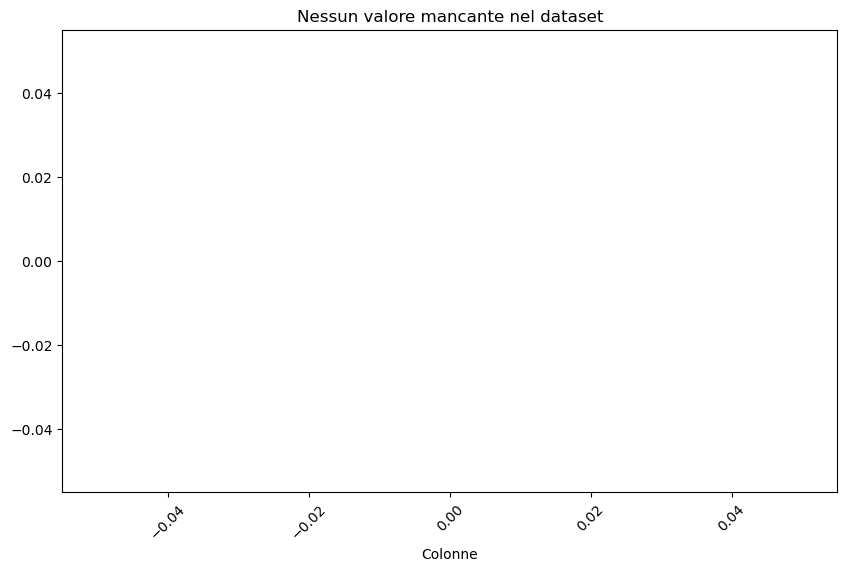

In [5]:
# Calcolo dei valori mancanti per ogni colonna
missing_values = df.isnull().sum()

# Impostazioni per il grafico a barre
plt.figure(figsize=(10, 6))

if missing_values.any():
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.title('Numero di valori mancanti per ogni colonna')
    plt.ylabel('Numero di valori mancanti')
else:
    plt.bar([], [])
    plt.title('Nessun valore mancante nel dataset')

plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.show()


<h2 style="color:#d9d2e9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La Gestione degli Outliers </h2>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   Gli outlier sono valori anomali che si distaccano notevolmente dalla normale distribuzione dei dati. Questi valori "fuori scala" possono influenzare drasticamente le previsioni di un modello statistico e vengono gestiti proprio per questo.

</p>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
 L'obbiettivo principale del codice qui sotto calcolare la media e la deviazione standard dei voti in queste materie, definire un criterio per identificare gli outliers (in questo caso quindi punteggi anomali) basato su due deviazioni standard dalla media, e infine contare quanti studenti hanno voti considerati outliers in ciascuna materia.
</p>

In [6]:
# Calcola la media e la deviazione standard per le colonne dei voti
means = df[['math score', 'reading score', 'writing score']].mean()
stds = df[['math score', 'reading score', 'writing score']].std()

# limite per gli outliers come 2 deviazioni standard dalla media
limits = 2 * stds

# Identifica gli outliers
outliers_math = df[(df['math score'] < means['math score'] - limits['math score']) | 
                     (df['math score'] > means['math score'] + limits['math score'])]
outliers_reading = df[(df['reading score'] < means['reading score'] - limits['reading score']) | 
                        (df['reading score'] > means['reading score'] + limits['reading score'])]
outliers_writing = df[(df['writing score'] < means['writing score'] - limits['writing score']) | 
                        (df['writing score'] > means['writing score'] + limits['writing score'])]

# Stampa il numero di outliers per ciascuna materia
print(f"Math Outliers: {outliers_math.shape[0]}")
print(f"Reading Outliers: {outliers_reading.shape[0]}")
print(f"Writing Outliers: {outliers_writing.shape[0]}")


Math Outliers: 46
Reading Outliers: 46
Writing Outliers: 42


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
 Il focus qui invece è identificare e visualizzare la percentuale di outliers (valori anomali) nei voti degli studenti in matematica, lettura e scrittura. Questi outliers sono definiti come i voti che si trovano al di fuori di due deviazioni standard dalla media. Proprio come vediamo la quantità di outliers per materia non sono neanche troppo differenti.
 
</p>

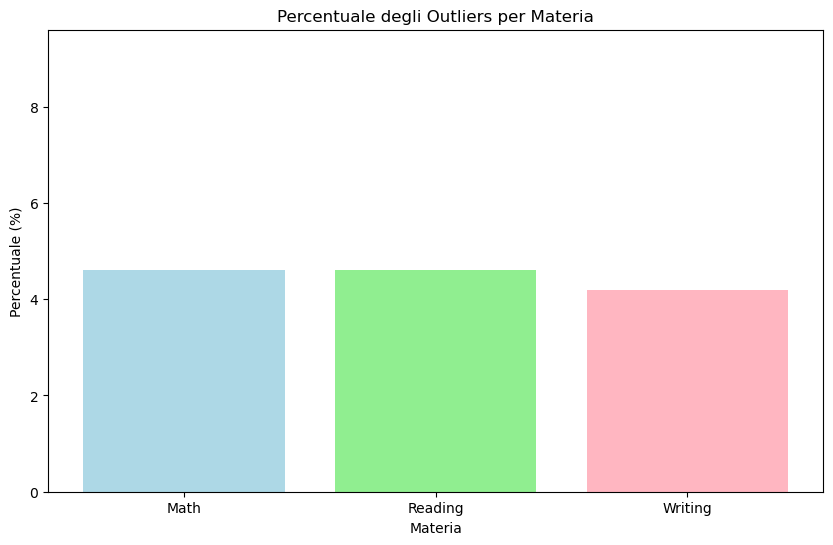

In [20]:
outliers_math = (df['math score'] < means['math score'] - limits['math score']) | \
                     (df['math score'] > means['math score'] + limits['math score'])

outliers_reading = (df['reading score'] < means['reading score'] - limits['reading score']) | \
                        (df['reading score'] > means['reading score'] + limits['reading score'])

outliers_writing = (df['writing score'] < means['writing score'] - limits['writing score']) | \
                        (df['writing score'] > means['writing score'] + limits['writing score'])

# Calcolare le percentuali degli outliers
percentages = {
    'Math': outliers_math.mean() * 100,
    'Reading': outliers_reading.mean() * 100,
    'Writing': outliers_writing.mean() * 100
}

# Creare un grafico a barre per mostrare le percentuali
plt.figure(figsize=(10, 6))
plt.bar(percentages.keys(), percentages.values(), color=['lightblue', 'lightgreen', 'lightpink'])
plt.title('Percentuale degli Outliers per Materia')
plt.ylabel('Percentuale (%)')
plt.xlabel('Materia')
plt.ylim(0, max(percentages.values()) + 5)  # Aggiunge un po' di spazio sopra la barra più alta
plt.show()


<h2 style="color:#fce5cd; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Lo scaling </h2>




<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Lo scaling è una tecnica usata in data science per regolare la scala dei dati numerici. Questo processo è importante perché i modelli di machine learning lavorano meglio quando i dati su cui sono addestrati hanno scale simili. In pratica, lo scaling può trasformare i punteggi degli esami o i redditi (che possono variare in un ampio intervallo) in valori che sono più facilmente confrontabili e gestibili per un modello. Ci sono diversi metodi di scaling, come lo Standard Scaling, che riduce i dati a una media di zero e una deviazione standard di uno, rendendo così i dati più omogenei e facilitando l'apprendimento del modello.
</p>

<h3 style="color:#f6b26b; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Metodo standart scaling </h3>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Lo Standard Scaling è una tecnica di preprocessing dei dati che regola la distribuzione dei valori di ogni caratteristica in modo che abbiano una media (μ) pari a 0 e una deviazione standard (σ) pari a 1. Questo metodo è anche conosciuto come "Z-score normalization". L'idea è di trasformare i dati in modo che si allineino con la distribuzione standard, facilitando la gestione da parte dei modelli di machine learning. Lo Standard Scaling è particolarmente utile quando i dati presentano caratteristiche con scale diverse e si vuole garantire che queste influenzino il modello in modo equilibrato, migliorando così la convergenza durante l'addestramento.
</p>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
Qui possiamo visualizzare il grafico prima dell'applicazione del metodo Standart scaling o Z-score normalization
</p>

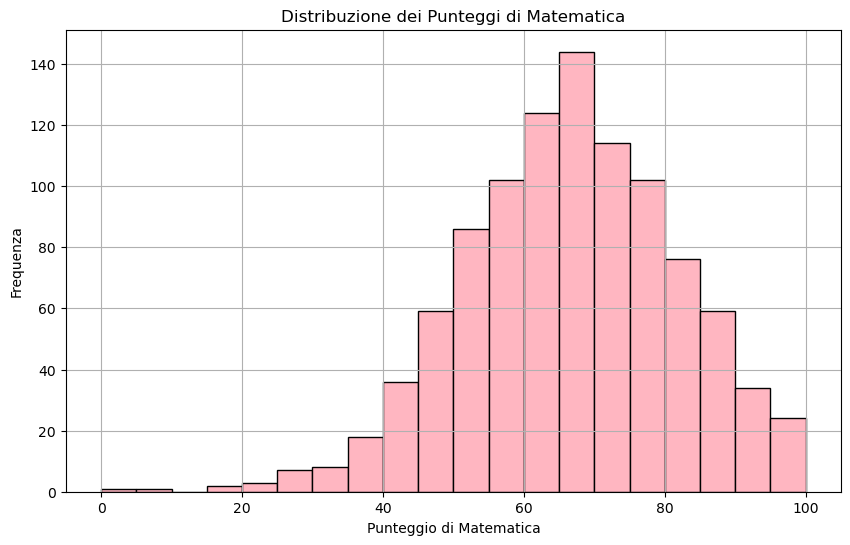

In [29]:
# Crea un istogramma per i punteggi di matematica
plt.figure(figsize=(10, 6))
plt.hist(df['math score'], bins=20, color='lightpink', edgecolor='black')
plt.title('Distribuzione dei Punteggi di Matematica')
plt.xlabel('Punteggio di Matematica')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Il codice qui sotto è strutturato per normalizzare i dati numerici del nostro dataset degli Students Performance utilizzando la tecnica dello Standard Scaling. Questo metodo di normalizzazione modifica i dati in modo che abbiano media zero e deviazione standard unitaria. 

</p>

In [28]:
# Seleziona solo le colonne con i punteggi per standardizzare questi valori
features = df[['math score', 'reading score', 'writing score']]

# Inizializzazione di StandardScaler
scaler = StandardScaler()

# Ciò calcolerà la media e la deviazione standard per ogni caratteristica
# e poi standardizzerà i dati sottraendo la media e dividendo per la deviazione standard
scaled_features = scaler.fit_transform(features)

# Converte il risultato in un DataFrame per una migliore leggibilità
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Visualizza le prime righe del DataFrame standardizzato
print(scaled_features_df.head())

   math score  reading score  writing score
0    0.390024       0.193999       0.391492
1    0.192076       1.427476       1.313269
2    1.577711       1.770109       1.642475
3   -1.259543      -0.833899      -1.583744
4    0.653954       0.605158       0.457333



<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
Dopo aver applicato lo Standard Scaling al dataset delle prestazioni degli studenti, visualizzeremo la distribuzione dei punteggi di matematica normalizzati.

</p>

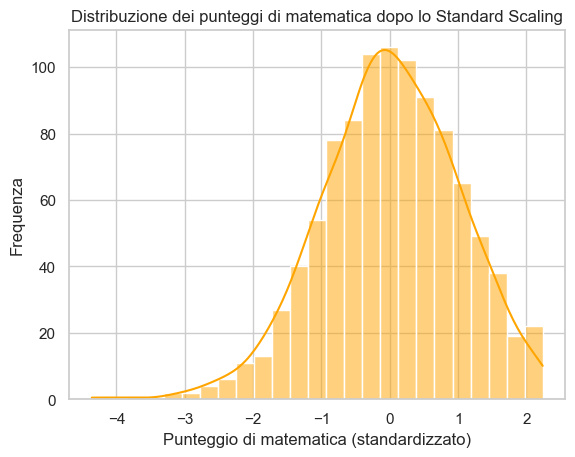

In [37]:
# Crea un istogramma dei dati scalati per 'math score'
sns.histplot(scaled_features_df['math score'], kde=True, color='orange')
plt.title('Distribuzione dei punteggi di matematica dopo lo Standard Scaling')
plt.xlabel('Punteggio di matematica (standardizzato)')
plt.ylabel('Frequenza')
plt.show()


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 CURIOSITA': Quando si utilizza il metodo Standard Scaling per standardizzare i dati, modifichi ciascun punteggio in modo che la media dei dati sia 0 e la deviazione standard sia 1. Questa trasformazione cambia la scala dei dati ma non la forma della loro distribuzione. Ecco perché l'aspetto del grafico dell'istogramma rimane invariato anche dopo la standardizzazione.
</p>

<h2 style="color:#ffddea; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La categoria ordinale </h2>



<p style="background-color:#ffddea; padding:15px; border-radius:5px; line-height:1.6;">
 La categoria ordinale si riferisce a una classificazione dove l'ordine tra i valori è significativo, ma non lo è necessariamente la distanza esatta tra di loro. Questo tipo di dato è comune nelle ricerche e nelle analisi statistiche, specialmente quando si valutano caratteristiche qualitative con un ordine intrinseco. Esempi possono includere livelli di accordo (come in un sondaggio con opzioni da "fortemente in disaccordo" a "fortemente d'accordo"), fasi di educazione, o livelli di priorità. 

</p>

In [22]:
# Definisce l'ordine per la colonna 'parental level of education'
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Converte della colonna in una categoria ordinale
df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                     categories=education_order,
                                                     ordered=True)

# Converte delle categorie ordinate in codici
df['parental level of education code'] = df['parental level of education'].cat.codes

# Visualizza le prime righe per verificare i cambiamenti
print(df[['parental level of education', 'parental level of education code']].head())


  parental level of education  parental level of education code
0           bachelor's degree                                 4
1                some college                                 2
2             master's degree                                 5
3          associate's degree                                 3
4                some college                                 2


<h2 style="color:#a2c4c9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Lo Splitting Dataset </h2>

<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Il dataset splitting è il processo di suddivisione di un dataset in due o più subset distinti, solitamente denominati set di training e set di test. Questa pratica è comunemente utilizzata nell'apprendimento automatico e nella modellazione statistica per valutare le prestazioni di un modello. 

</p>



<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Utilizzando la libreria scikit-learn precedentemente importata per preparare i dati per l'addestramento e la validazione di un modello di machine learning, questo codice mostra come dividere il nostro dataset di prestazioni degli studenti in un training set e un test set.
</p>

In [30]:

# Utilizza le colonne dei voti come features (X) e 'gender' come target (y)
X = df[['math score', 'reading score', 'writing score']]
y = df['gender']

# Splitting del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensioni dei set
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (800, 3) (800,)
Test set: (200, 3) (200,)


<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
L'obiettivo di questo grafico è di confermare che lo splitting dei dati ha mantenuto una distribuzione uniforme dei punteggi di matematica tra il training set e il test set, assicurando che entrambi contengano una varietà rappresentativa di punteggi. E' molto importante per l'affidabilità dei risultati dell'addestramento e della valutazione del modello.
</p>

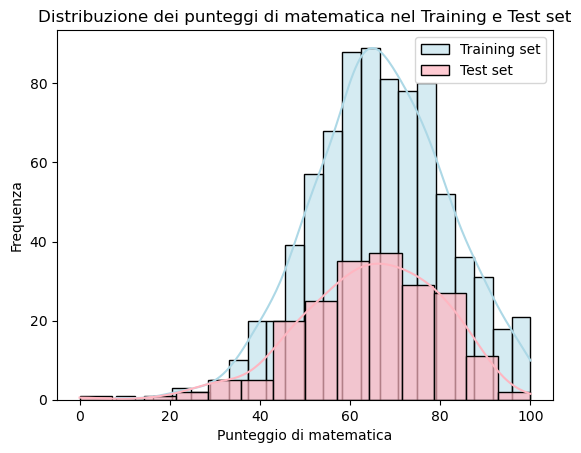

In [31]:
sns.histplot(X_train['math score'], kde=True, color='lightblue', label='Training set')
# Grafico per il test set
sns.histplot(X_test['math score'], kde=True, color='lightpink', label='Test set', alpha=0.7)
plt.title('Distribuzione dei punteggi di matematica nel Training e Test set')
plt.xlabel('Punteggio di matematica')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Questo codice invece dimostra come dividere ulteriormente il training set in un subset di addestramento e un subset di validazione, e poi visualizza la distribuzione dei punteggi di matematica tra questi subset e il test set originale. Il compito di questo codice è garantire che ogni subset rappresenti adeguatamente l'intero dataset in termini di distribuzione dei punteggi di matematica.
</p>

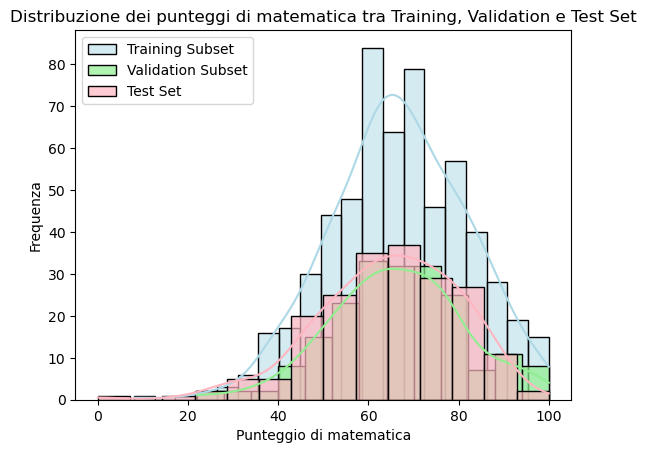

In [32]:
# Suddivide ulteriormente il training set in un subset di addestramento e un subset di validazione
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Grafico che mostra la distribuzione dei punteggi di matematica tra i vari subset
sns.histplot(X_train_sub['math score'], kde=True, color='lightblue', label='Training Subset')
sns.histplot(X_val_sub['math score'], kde=True, color='lightgreen', label='Validation Subset', alpha=0.7)
sns.histplot(X_test['math score'], kde=True, color='lightpink', label='Test Set', alpha=0.7)
plt.title('Distribuzione dei punteggi di matematica tra Training, Validation e Test Set')
plt.xlabel('Punteggio di matematica')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


<h2 style="color:#93c47d; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Statistiche Interessanti </h2>

<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> Distribuzione dei vari punteggi </h2>

<p style="background-color:#b5e79f; padding:15px; border-radius:5px; line-height:1.6;">
In questo codice possiamo visualizzare la distribuzione dei punteggi delle varie materie grazie a seaborn e matplotlib
</p>

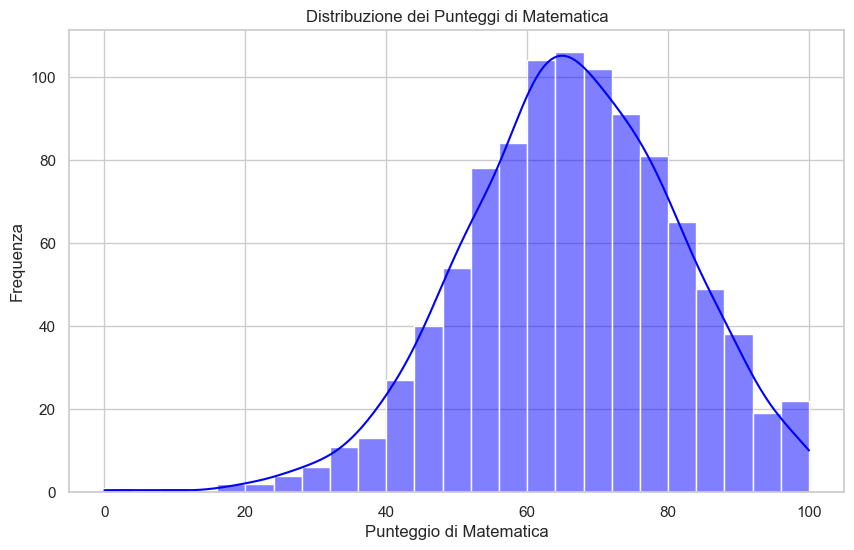

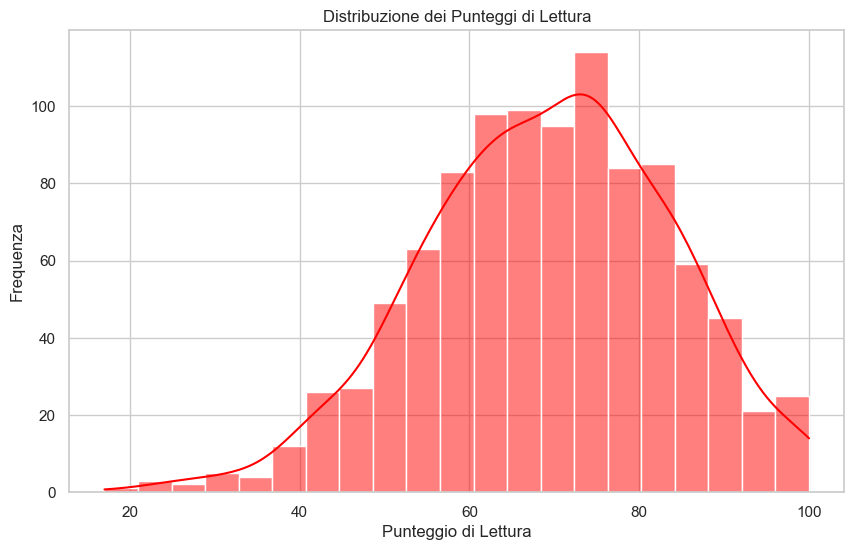

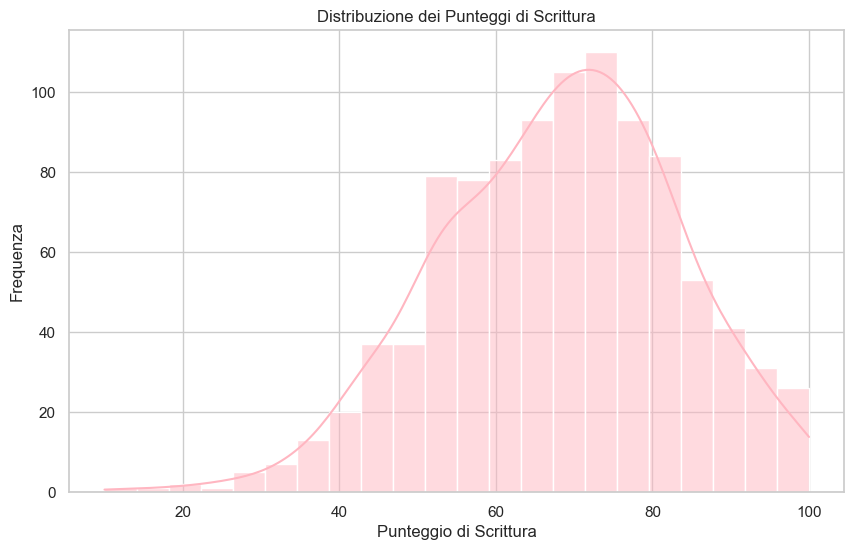

In [36]:
df = pd.read_csv("C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv")
# Impostazioni di stile per i grafici
sns.set(style="whitegrid")

# Istogramma per i punteggi di matematica
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math score', kde=True, color='blue')
plt.title('Distribuzione dei Punteggi di Matematica')
plt.xlabel('Punteggio di Matematica')
plt.ylabel('Frequenza')
plt.show()

# Istogramma per i punteggi di lettura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reading score', kde=True, color='red')
plt.title('Distribuzione dei Punteggi di Lettura')
plt.xlabel('Punteggio di Lettura')
plt.ylabel('Frequenza')
plt.show()

# Istogramma per i punteggi di scrittura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='writing score', kde=True, color='lightpink')
plt.title('Distribuzione dei Punteggi di Scrittura')
plt.xlabel('Punteggio di Scrittura')
plt.ylabel('Frequenza')
plt.show()


<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> Correlazioni tra i punteggi </h2>

<p style="background-color:#b5e79f; padding:15px; border-radius:5px; line-height:1.6;">
Qui possiamo visualizzare la matrice di correlazione tra i punteggi di matematica, lettura e scrittura. La heatmap aiuta a identificare le relazioni tra le varie misurazioni. Ecco una spiegazione passo per passo del codice:
</p>

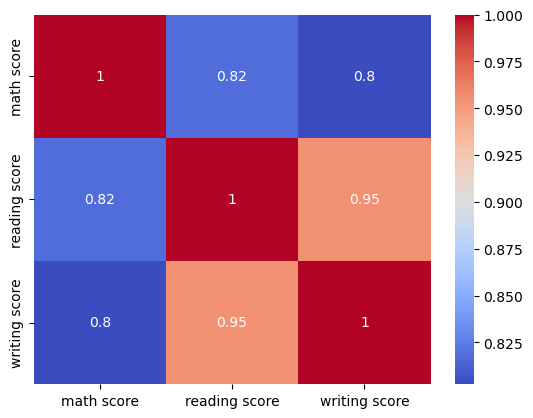

In [33]:

corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> Completamento del corso di preparazione per genere </h2>

<p style="background-color:#b5e79f; padding:15px; border-radius:5px; line-height:1.6;">
Questo codice statistico aggrega i dati per genere e per stato di completamento del corso di preparazione, e poi crea un grafico a barre impilato per visualizzare il numero di studenti per ogni genere che hanno completato o meno il corso di preparazione. Questo è utile per osservare le differenze di partecipazione tra i generi.
</p>

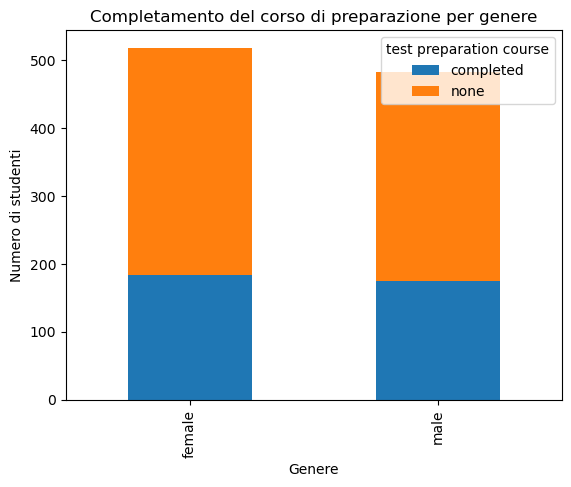

In [34]:
course_completion = df.groupby(['gender', 'test preparation course']).size().unstack()
course_completion.plot(kind='bar', stacked=True)
plt.title('Completamento del corso di preparazione per genere')
plt.xlabel('Genere')
plt.ylabel('Numero di studenti')
plt.show()


<h2 style="color:#b5e79f; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Modello di predizione </h2>

<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;">
    Con il codice qui sotto, vedremo come un processo di machine learning per prevedere il punteggio in matematica degli studenti basandosi sulla loro etnia, utilizza il metodo di Linear Regression.
    Dopo aver caricato il dataset (file csv) da cui si prendono le informazioni, trasformando la colonna etnica da testuale a numerica, divide i dati in un set per l'addestramento del modello e un altro per testarlo. Ed è qui che il modello di regressione lineare viene poi addestrato su questi dati.
    Infine, il codice chiede all'utente di inserire un gruppo etnico e usa il modello per prevedere il punteggio medio in matematica per quel gruppo, stampando il risultato.
</p>


In [35]:
#Si importano qui le varie librerie necessarie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# dataset caricato
df = pd.read_csv("C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv")

# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

# Suddivide i dati in caratteristiche (X) e target (y)
X = df[["race/ethnicity"]]
y = df["math score"]

# Suddivide i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Prevede il punteggio di matematica per un gruppo specifico
group_name = input("Inserisci il nome del gruppo di cui vuoi predirre il voto in matematica: ")
group_encoded = le.transform([group_name])
predicted_score = model.predict([group_encoded])

print(f"Il punteggio di matematica previsto per il gruppo {group_name} è {predicted_score[0]}")

Inserisci il nome del gruppo di cui vuoi predirre il voto in matematica: group A
Il punteggio di matematica previsto per il gruppo group A è 60.728626347231206


C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
